In [19]:
import polars as pl
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<a class="anchor" id='import'>
<font color = '#006400'>
    
# **1. Which genres have the highest and lowest average ratings?**</font>
</a>

In [ ]:
parquet_path = os.path.expanduser("~/Downloads/v1stquestion.parquet")
df = pl.read_parquet(parquet_path)
print(df.head())
print(df.dtypes)

shape: (5, 2)
┌─────────────┬────────────────┐
│ genres      ┆ average_rating │
│ ---         ┆ ---            │
│ str         ┆ f64            │
╞═════════════╪════════════════╡
│ Film-Noir   ┆ 3.927313       │
│ War         ┆ 3.800017       │
│ Documentary ┆ 3.750915       │
│ Crime       ┆ 3.699463       │
│ Drama       ┆ 3.694619       │
└─────────────┴────────────────┘
[String, Float64]


/var/folders/dj/4fxkk9c17s11y02xlhh_09k00000gn/T/ipykernel_4527/1710704286.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


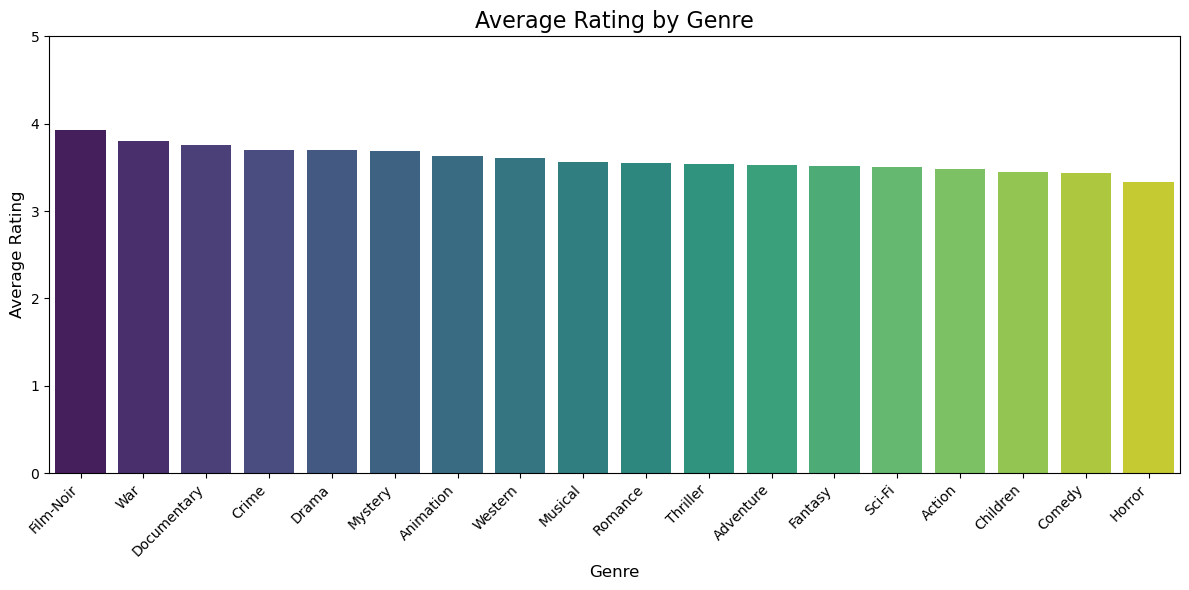

In [7]:
df_pd = df.to_pandas()

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_pd,
    x='genres',
    y='average_rating',
    palette='viridis',
    order=df_pd['genres']  # mantém a ordem do df original
)

plt.xticks(rotation=45, ha='right')
plt.title('Average Rating by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.ylim(0, 5)
plt.tight_layout()

plt.show()

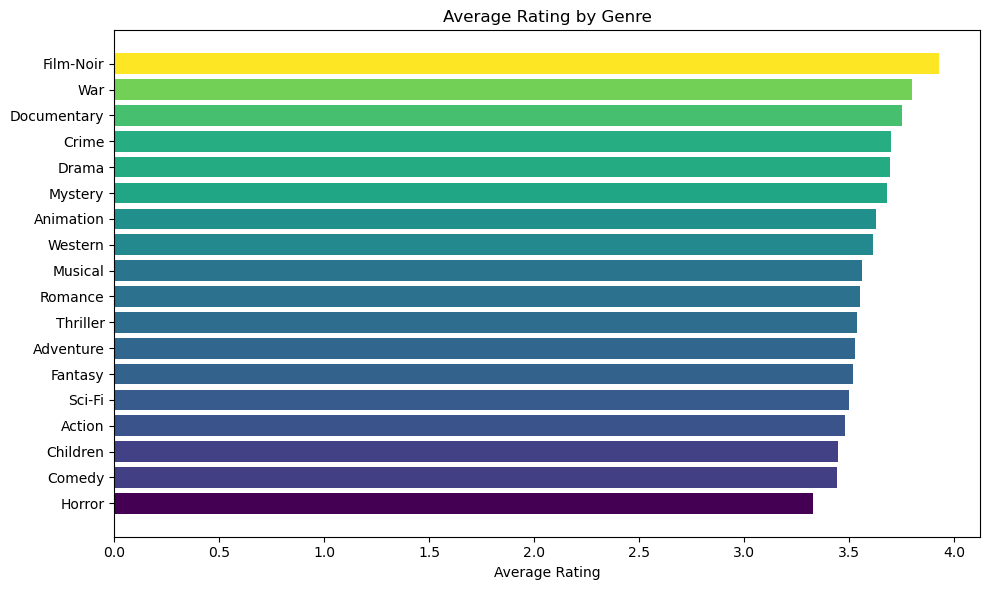

In [9]:
# Converter para Pandas
df_pd = df.to_pandas()

# Cores graduadas do mínimo para o máximo
norm = plt.Normalize(df_pd['average_rating'].min(), df_pd['average_rating'].max())
colors = plt.cm.viridis(norm(df_pd['average_rating']))

plt.figure(figsize=(10,6))
plt.barh(df_pd['genres'], df_pd['average_rating'], color=colors)
plt.xlabel('Average Rating')
plt.title('Average Rating by Genre')
plt.gca().invert_yaxis()  # coloca o maior em cima
plt.tight_layout()
plt.show()

<a class="anchor" id='import'>
<font color = '#006400'>
    
# **2. Which genre combinations (e.g., Drama + Romance) are most frequent and best rated?**</font>
</a>

<a class="anchor" id='import'>
<font color = '#006400'>
    
## **2.1 Which genre combinations (e.g., Drama + Romance) are best rated?**</font>

In [22]:
parquet_path = os.path.expanduser("~/Downloads/v2ndquestion_bestrated.parquet")

df = pl.read_parquet(parquet_path)

print(df)

df_pd = df.to_pandas()

shape: (10, 2)
┌─────────────────────────────────┬────────────────┐
│ genres                          ┆ average_rating │
│ ---                             ┆ ---            │
│ str                             ┆ f64            │
╞═════════════════════════════════╪════════════════╡
│ Action|Adventure|Mystery|Roman… ┆ 4.187254       │
│ Adventure|Animation|Fantasy     ┆ 4.159904       │
│ Action|Adventure|Crime|Drama|T… ┆ 4.151695       │
│ Film-Noir|Romance|Thriller      ┆ 4.146511       │
│ Film-Noir|Mystery               ┆ 4.145631       │
│ Animation|Children|Drama|Fanta… ┆ 4.141744       │
│ Action|Adventure|Animation|Dra… ┆ 4.132371       │
│ Action|Adventure|Western        ┆ 4.12556        │
│ Crime|Film-Noir|Mystery         ┆ 4.117121       │
│ Action|Adventure|Comedy|Fantas… ┆ 4.11336        │
└─────────────────────────────────┴────────────────┘


/var/folders/dj/4fxkk9c17s11y02xlhh_09k00000gn/T/ipykernel_4527/207392235.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


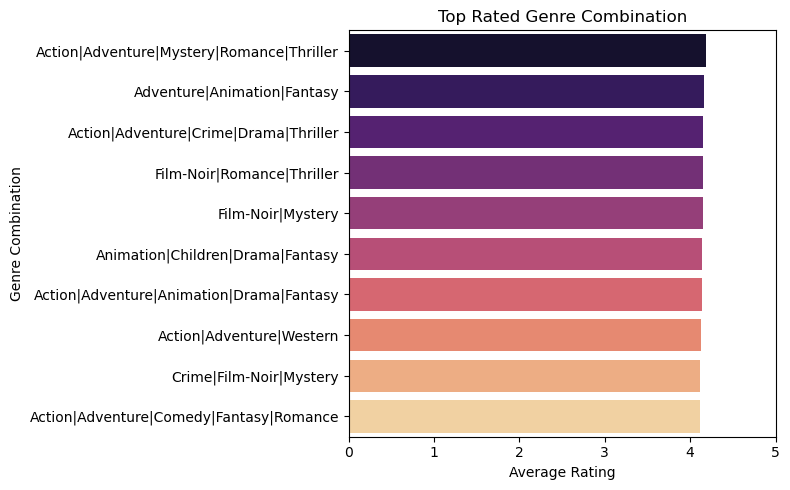

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=df_pd,
    x='average_rating',
    y='genres',
    palette='magma'
)

plt.xlabel('Average Rating')
plt.ylabel('Genre Combination')
plt.title('Top Rated Genre Combination')
plt.xlim(0, 5)
plt.tight_layout()
plt.show()

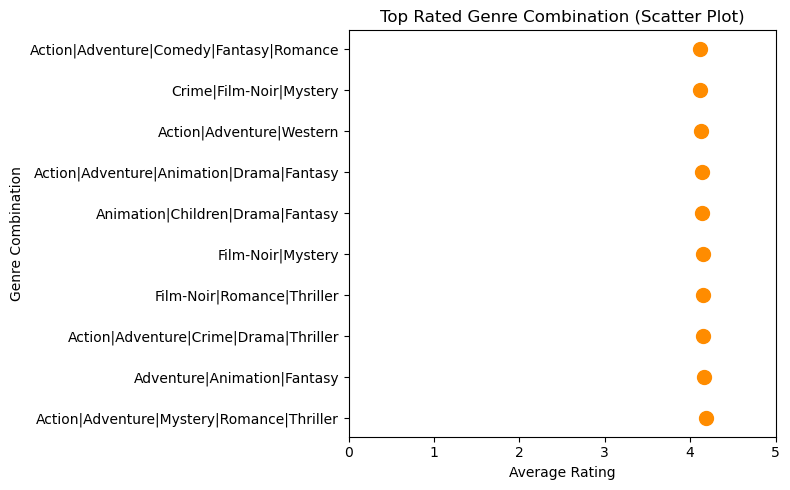

In [17]:
plt.figure(figsize=(8,5))
plt.scatter(df_pd['average_rating'], df_pd['genres'], s=100, color='darkorange')
plt.xlabel('Average Rating')
plt.ylabel('Genre Combination')
plt.title('Top Rated Genre Combination (Scatter Plot)')
plt.xlim(0,5)
plt.tight_layout()
plt.show()

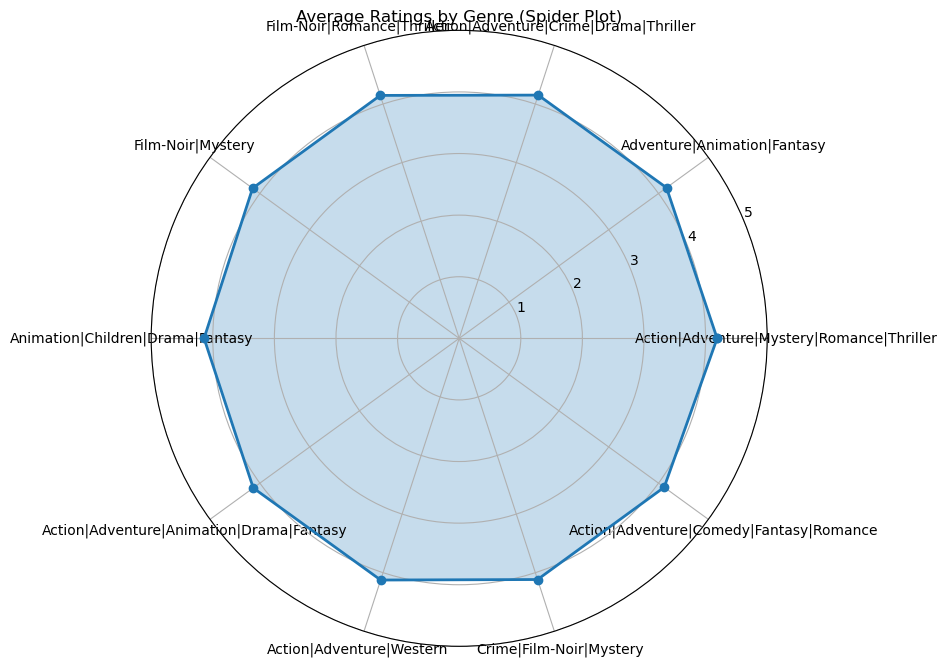

In [20]:
labels = df_pd['genres']
stats = df_pd['average_rating']

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
stats = stats.tolist()
stats += stats[:1]  # fechar o círculo
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title('Average Ratings by Genre (Spider Plot)')
ax.set_ylim(0, 5)
plt.show()

<a class="anchor" id='import'>
<font color = '#006400'>
    
## **2.2 Which genre combinations (e.g., Drama + Romance) are most frequent?**</font>

In [28]:
parquet_path = os.path.expanduser("~/Downloads/v2ndquestion_freq.parquet")

df = pl.read_parquet(parquet_path)
print(df)
df_pd = df.to_pandas()

shape: (10, 2)
┌─────────────────────────────────┬─────────────┐
│ genres                          ┆ freq        │
│ ---                             ┆ ---         │
│ str                             ┆ i64         │
╞═════════════════════════════════╪═════════════╡
│ Action|Adventure|Sci-Fi         ┆ 28513564525 │
│ Crime|Drama                     ┆ 27077107572 │
│ Drama|Romance                   ┆ 16762000347 │
│ Comedy|Romance                  ┆ 15211593908 │
│ Action|Adventure|Sci-Fi|Thrill… ┆ 15174431567 │
│ Action|Sci-Fi|Thriller          ┆ 15090351226 │
│ Comedy|Crime|Drama|Thriller     ┆ 13327073288 │
│ Action|Crime|Thriller           ┆ 12660005262 │
│ Action|Drama|War                ┆ 11743392044 │
│ Adventure|Fantasy               ┆ 11006043203 │
└─────────────────────────────────┴─────────────┘


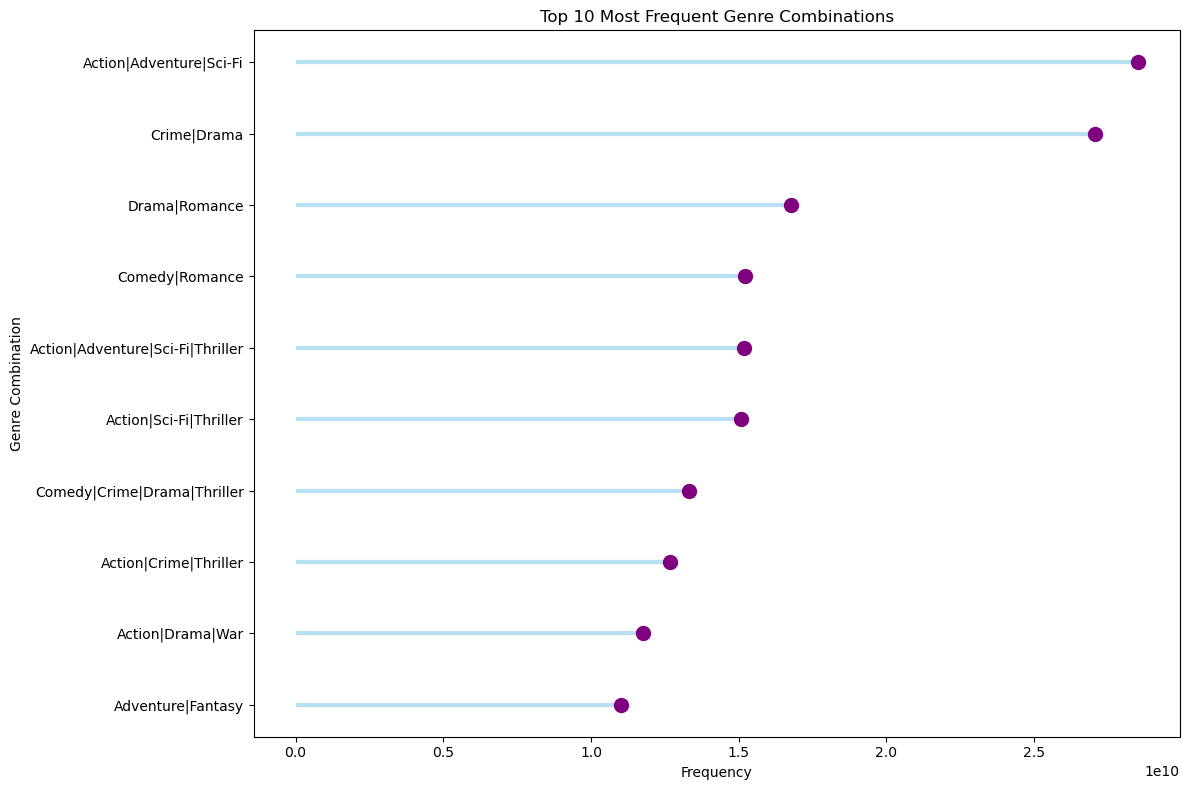

In [ ]:
df_pd_sorted = df_pd.iloc[::-1]

plt.figure(figsize=(12,8))
plt.hlines(y=df_pd_sorted['genres'], xmin=0, xmax=df_pd_sorted['freq'], color='skyblue', alpha=0.6, linewidth=3)
plt.plot(df_pd_sorted['freq'], df_pd_sorted['genres'], "o", color='purple', markersize=10)
plt.xlabel('Frequency')
plt.ylabel('Genre Combination')
plt.title('Top 10 Most Frequent Genre Combinations')
plt.tight_layout()
plt.show()

<a class="anchor" id='import'>
<font color = '#006400'>
    
# **3. Which movies are 'underrated' vs. 'overrated'? (Compare average rating vs. number of ratings.)**</font>

<a class="anchor" id='import'>
<font color = '#006400'>
    
## **3.1 Which movies are 'underrated'**</font>

In [38]:
parquet_underrated = "~/Downloads/v3rdquestion_underrated.parquet"
underrated = pl.read_parquet(parquet_underrated)
df_underrated = underrated.to_pandas()


/var/folders/dj/4fxkk9c17s11y02xlhh_09k00000gn/T/ipykernel_4527/1296157574.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


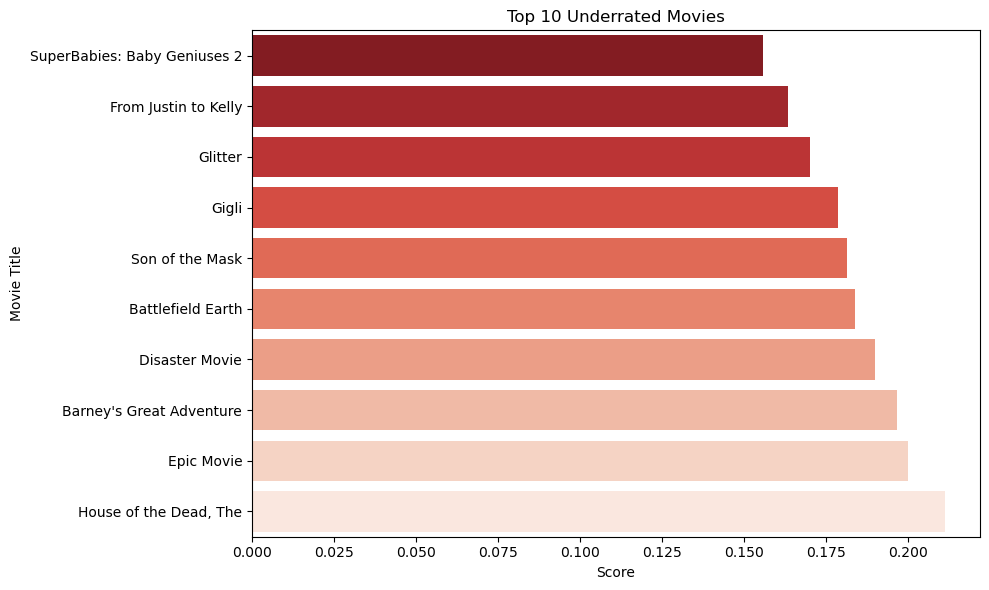

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_underrated,
    y='title',
    x='underrated_score',
    palette='Reds_r'
)
plt.title("Top 10 Underrated Movies")
plt.xlabel("Score")
plt.ylabel("Movie Title")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<a class="anchor" id='import'>
<font color = '#006400'>
    
## **3.2 Which movies are 'overrated'**</font>

In [35]:
parquet_path = "~/Downloads/v3rdquestion_overrated.parquet"
overrated = pl.read_parquet(parquet_path)
df_overrated = overrated.to_pandas()

/var/folders/dj/4fxkk9c17s11y02xlhh_09k00000gn/T/ipykernel_4527/2001499669.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


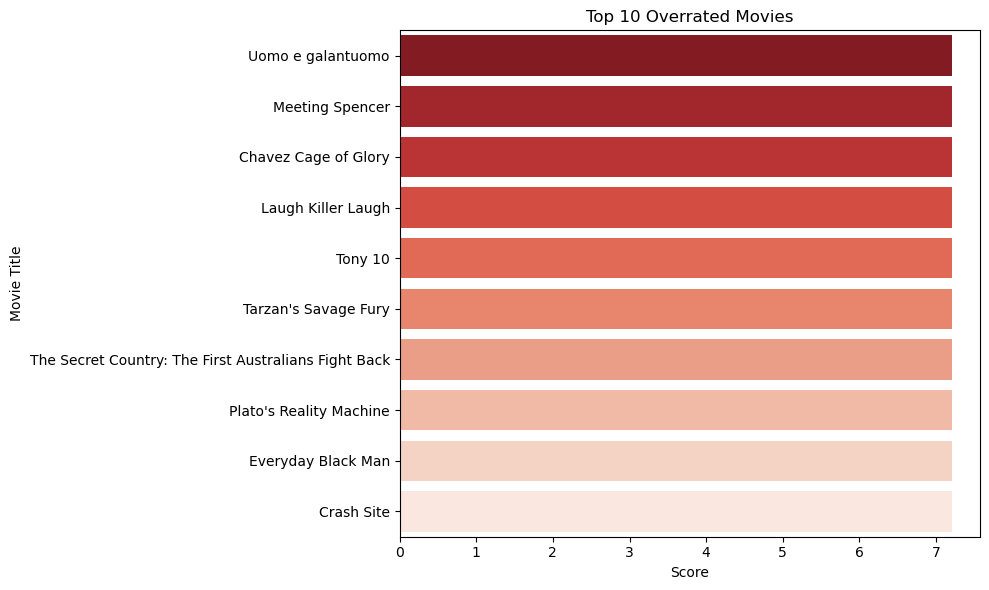

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_overrated,
    y='title',
    x='overrated_score', 
    palette='Reds_r'  
)
plt.title("Top 10 Overrated Movies")
plt.xlabel("Score")
plt.ylabel("Movie Title")
plt.tight_layout()
plt.show()

<a class="anchor" id='import'>
<font color = '#006400'>
    
# **4. Does genre diversity (single-genre vs. multi-genre) influence popularity?**</font>

In [40]:
parquet_path = "~/Downloads/v4thquestion_genres.parquet"
df = pl.read_parquet(parquet_path).to_pandas()

/var/folders/dj/4fxkk9c17s11y02xlhh_09k00000gn/T/ipykernel_4527/3810022283.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


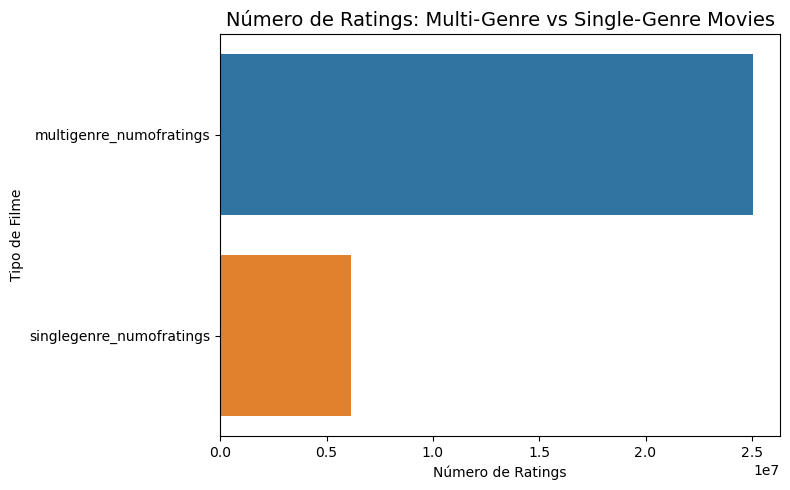

In [41]:
df_melted = df.melt(var_name="Genre_Type", value_name="Num_of_Ratings")

plt.figure(figsize=(8,5))
sns.barplot(
    data=df_melted,
    y="Genre_Type",
    x="Num_of_Ratings",
    palette=["#1f77b4", "#ff7f0e"]
)
plt.title("Número de Ratings: Multi-Genre vs Single-Genre Movies", fontsize=14)
plt.xlabel("Número de Ratings")
plt.ylabel("Tipo de Filme")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()